In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# Additional imports
import pystac_client
import xarray as xr
import pathlib
import os
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time

from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm

from shapely.geometry import box


In [23]:
# opening STAC catalog, either a url, cloud storage link or a local (cloned) folder
cwd = pathlib.Path().resolve()

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    #os.path.join(os.path.dirname(cwd), "stac_folder", "current", "catalog.json") # local clone 
)
catalog

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\pystac_client\client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


<Client id=gca-catalog>

In [24]:
list(catalog.get_children())

[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Exp_world_pop_parquet>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>,
 <CollectionClient id=Exp-Delta_DEM_COGs>]

In [25]:
collection= catalog.get_child("Exp_world_pop_parquet")
collection

<CollectionClient id=Exp_world_pop_parquet>

In [27]:
href = catalog.get_child("Exp_world_pop_parquet").assets["data"].href
href

'gs://dgds-data-public/gca/SOTC/Exp_world_pop.parquet/*.parquet'

In [28]:
href

'gs://dgds-data-public/gca/SOTC/Exp_world_pop.parquet/*.parquet'

In [8]:
template_df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template_Netherland_Antilles.csv")
template_df.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136


In [9]:

circle_center = gpd.GeoDataFrame(
    template_df, geometry=gpd.points_from_xy(template_df.Intersect_lon, template_df.Intersect_lat), crs="EPSG:4326"
)
circle_center

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.40103 12.30197)
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.40454 12.29923)
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.40765 12.29606)
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.41024 12.29248)
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.41218 12.28853)
...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.30046 12.16682)
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.30491 12.16745)
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.30938 12.16766)
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.31387 12.16760)


In [29]:


# Extract bounding box coordinates
xmin, ymin, xmax, ymax = circle_center.total_bounds

# Create a bounding box polygon
bbox = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])

In [31]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar


# # export to zarr in write mode (to overwrite if exists)

with ProgressBar():


    

    # Read the Parquet file as a Dask DataFrame
    ddf = dd.read_parquet(href,engine='pyarrow')

    # Filter lon and lat columns
    filtered_ddf = ddf[(ddf['xcoord'] >= xmin) & (ddf['xcoord'] <= xmax) & (ddf['ycoord'] >= ymin) & (ddf['ycoord'] <= ymax)]

    # Compute the result
    filtered_df = filtered_ddf.compute()



[########################################] | 100% Completed | 38.75 s


In [35]:

data_points_within_extent = gpd.GeoDataFrame(
    filtered_df, geometry=gpd.points_from_xy(filtered_df.xcoord, filtered_df.ycoord), crs="EPSG:4326"
)
data_points_within_extent

,fid,pop_count,layer,area,perimeter,Tot_pop_count,xcoord,ycoord,geometry
0,1,0,_abw_ppp_2020_UNadj_constrained,1.388889e-06,0.005000,0,-70.053750,12.615833,POINT (-70.05375 12.61583)
1,2,0,_abw_ppp_2020_UNadj_constrained,1.388889e-06,0.005000,0,-70.053750,12.614167,POINT (-70.05375 12.61417)
2,3,2,_abw_ppp_2020_UNadj_constrained,2.083333e-06,0.006667,6,-70.053055,12.607222,POINT (-70.05306 12.60722)
3,4,4,_abw_ppp_2020_UNadj_constrained,6.944444e-07,0.003333,4,-70.047500,12.606667,POINT (-70.04750 12.60667)
4,5,0,_abw_ppp_2020_UNadj_constrained,1.388889e-06,0.005000,0,-70.046250,12.606667,POINT (-70.04625 12.60667)
...,...,...,...,...,...,...,...,...,...
324007,168651510,16,_ven_ppp_2020_UNadj_constrained,6.944444e-07,0.003333,16,-69.838333,12.029167,POINT (-69.83833 12.02917)
324008,168651511,14,_ven_ppp_2020_UNadj_constrained,1.388889e-06,0.005000,28,-69.840000,12.028750,POINT (-69.84000 12.02875)
324009,168651512,15,_ven_ppp_2020_UNadj_constrained,6.944444e-07,0.003333,15,-69.877500,12.028333,POINT (-69.87750 12.02833)
324010,168651513,14,_ven_ppp_2020_UNadj_constrained,6.944444e-07,0.003333,14,-69.840833,12.027500,POINT (-69.84083 12.02750)


In [36]:
check_distance=0.01



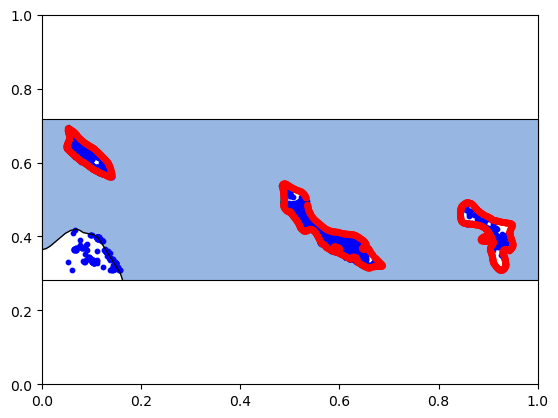

In [37]:


# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
buffer_circles = gpd.GeoDataFrame({'geometry': [Polygon(p.buffer(check_distance)) for p in circle_center['geometry']]})


# Step 2: Visualize these 2 geospatial datasets on a map
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.PlateCarree())

data_points_within_extent.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')


# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
plt.show()


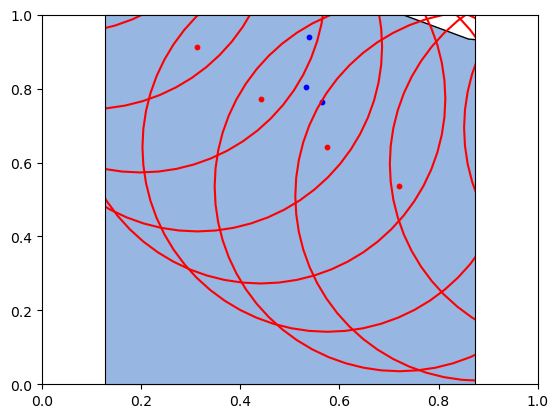

In [39]:
search_radius=check_distance
lon_x=-69.07256	
lat_y=12.18975



# Step 2: Visualize these 2 geospatial datasets on a map
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.PlateCarree())

data_points_within_extent.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

# Set the axis limits to the extent of circle_center
# xmin, ymin, xmax, ymax = circle_center.total_bounds
xmin,xmax=lon_x-search_radius,lon_x+search_radius
ymin,ymax=lat_y-search_radius,lat_y+search_radius
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()


In [46]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points_within_extent[data_points_within_extent.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
#     inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

#     # Sort inside_points by 'distance' in ascending order
#     sorted_inside_points = inside_points.sort_values(by='distance')

#     # Select the top 2 rows
#     nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,'pop_count']=0
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,'pop_count']=inside_points["Tot_pop_count"].sum()
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 623/623 [00:01<00:00, 421.51it/s]


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,sampled points,pop_count
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.40103 12.30197),1.0,7.0
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.40454 12.29923),0.0,0.0
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.40765 12.29606),0.0,0.0
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.41024 12.29248),0.0,0.0
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.41218 12.28853),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.30046 12.16682),2.0,11.0
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.30491 12.16745),0.0,0.0
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.30938 12.16766),0.0,0.0
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.31387 12.16760),0.0,0.0


In [47]:
circle_center.describe()

,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,sampled points,pop_count
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,-68.949171,12.251419,-68.949236,12.251409,-68.949302,12.251398,14.911717,364.430177
std,0.610307,0.157667,0.610693,0.158956,0.611143,0.160484,29.755114,850.492028
min,-70.052990,12.035837,-70.058781,12.027054,-70.067711,12.018272,0.000000,0.000000
25%,-69.141392,12.129905,-69.146624,12.124626,-69.150329,12.124619,0.000000,0.000000
50%,-68.907842,12.214181,-68.910344,12.214310,-68.911654,12.209548,2.000000,6.000000
75%,-68.336914,12.348892,-68.335279,12.354506,-68.334995,12.358570,10.000000,205.500000
max,-68.204993,12.612777,-68.196121,12.618658,-68.187140,12.625781,162.000000,5519.000000


In [48]:
circle_center.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\world_pop\Netherland_Antilles_world_pop.csv",index=False)

In [49]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\world_pop\Netherland_Antilles_world_pop.csv")
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,sampled points,pop_count
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.4010327965 12.3019667269),1.0,7.0
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.4045404821 12.2992259882),0.0,0.0
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.4076539598 12.2960629139),0.0,0.0
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.4102441499 12.2924830911),0.0,0.0
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.4121789278 12.2885311896),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.3004638825 12.1668173929),2.0,11.0
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.304908173 12.1674528229),0.0,0.0
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.3093809111 12.1676642697),0.0,0.0
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.3138720252 12.1676012754),0.0,0.0


In [55]:


# Define your discrete color scale
color_scale = ['#D9EAD3', '#A9D08E', '#F9D670', '#FFA94D', '#FF704D', '#FF4D4D']

# Create the scatter mapbox plot using Plotly Graph Objects
fig2 = go.Figure(go.Scattermapbox(
    lat=df['Intersect_lat'],
    lon=df['Intersect_lon'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['pop_count'],  # Use the 'Land_sub' column for color
        # colorscale=color_scale,  # Specify the discrete color scale
        # cmin=1,  # Set the minimum value for the color scale
        # cmax=6,  # Set the maximum value for the color scale
        colorbar=dict(
            title='Total population count'  # Set color bar title
        )
    ),
    hoverinfo='text',
    hovertext=df['pop_count'],
    showlegend=False
))

# Create the scatter mapbox plot using Plotly Graph Objects
fig2.add_trace(go.Scattermapbox(
    lat=data_points_within_extent['ycoord'],
    lon=data_points_within_extent['xcoord'],
    mode='markers',
    marker=dict(
        size=5,
        color='red',  # Set color to red
        # color=data_points_within_extent['Tot_pop_count'],
    ),
    hoverinfo='text',
    hovertext=data_points_within_extent['Tot_pop_count'],
    name='population count datapoints'
))

# Update layout properties
fig2.update_layout(
    title="population count in the Dutch Antilles",
    mapbox_style="carto-positron",
    mapbox=dict(
        zoom=8,
        center=dict(lat=12.18625, lon=-69.00168)
    ),		

    margin=dict(l=0, r=50, b=0, t=50),
    legend=dict(
    x=1.15,
    y=1.0,
    traceorder="normal",
    orientation="v"
)
)

# Show the plot
fig2.show()

